# Testing for Shoefly.com
***

# Introduction

This is a project from CodeAcademy to practice A/B testing. The fictional company analyzed is an online shoe store called ShoeFly.com. Currently, the company has two different versions of an ad. They have placed the ads in emails as well as in banner ads on Facebook, Twitter, and Google. They want to know how the two ads are performing on each of the different platforms on each day of the week. Help them analyze the data using aggregate measures. 

## Project Goals
* Analyze the data from an A/B test with Python
* Some questions that will be answered are the following:

    1. How many views came from each utm_source?
    1. Was there a difference in click rates for each source?
    1. Were approximately the same number of people shown both ads?
    1. Product manager for the A/B test thinks that the clicks might have changed by day of the week.
    1. Do you recommend that your company use Ad A or Ad B?

# Data

Shoefly has provided the data as a csv file, *ad_clicks*, with the following attributes:
* *user_id* - the user_id of the customer
* *utm_source* - the locationn where the ad was placed
* *day* - what day of the week the ad was viewed by the customer
* *ad_click_timestamp* - a timestamp for when the ad was clicked and note that NaN values if the ad was not clicked
* *experimental_group* - which ad, A or B, the customer was shown

### Load data

In [1]:
# Load necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for calculations
import seaborn as sns # for creating visualizations

%matplotlib inline

In [2]:
# Fill in the line below: Specify the path of the CSV file to read
my_filepath = "../input/ad-clicks/ad_clicks.csv"

# Fill in the line below: Read the file into a variable
ad_clicks = pd.read_csv(my_filepath)

In [3]:
# To preview the dataframe to see what data we are working with
ad_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B


# Process Data


In [4]:
# Check that we have approximetely the same amount of participants in each 
# experimental group

ad_clicks.groupby('experimental_group')\
    .user_id.count()\
    .reset_index()

,experimental_group,user_id
0,A,827
1,B,827


In [5]:
# How many views (ie, rows of the table) came from each utm_source?
# Can use any of the columns because using the count() to find value of rows of the table. 
# Recall that added .reset_index() to return result from a series to a dataframe.

ad_clicks.groupby('utm_source')\
    .user_id.count()\
    .reset_index()

,utm_source,user_id
0,email,255
1,facebook,504
2,google,680
3,twitter,215


In [6]:
# Filter the data to remove NaN values since those mean the user never clicked the ads 
# and add a new column is_click. ~ is a NOT operator to invert the results of .isnull() 
# since .isnull() will return True for NaN and we want it to return False

ad_clicks['is_click'] = ~ad_clicks\
   .ad_click_timestamp.isnull()

# We want to know the percent of people who clicked on ads from each utm_source.
# Start by grouping by utm_source and is_click and counting the number of user_id‘s in each of those groups. 
# Save your answer to the variable clicks_by_source.
clicks_by_source = ad_clicks\
   .groupby(['utm_source',
             'is_click'])\
   .user_id.count()\
   .reset_index()

clicks_by_source

,utm_source,is_click,user_id
0,email,False,175
1,email,True,80
2,facebook,False,324
3,facebook,True,180
4,google,False,441
5,google,True,239
6,twitter,False,149
7,twitter,True,66


# Analysis

In [7]:
# Pivot the data so that columns are is_click (True or False), the index is utm_source, 
# and the values are user_id

clicks_pivot = clicks_by_source\
   .pivot(index='utm_source',
          columns='is_click',
          values='user_id')\
   .reset_index()

# Was there a difference in click rates for each source? Find the percent clicked and add 
# a new columm in the clicks_pivot table

clicks_pivot['percent_clicked'] = \
   round(clicks_pivot[True] / \
   (clicks_pivot[True] + 
    clicks_pivot[False])\
    *100,2)
    
clicks_pivot

is_click,utm_source,False,True,percent_clicked
0,email,175,80,31.37
1,facebook,324,180,35.71
2,google,441,239,35.15
3,twitter,149,66,30.70


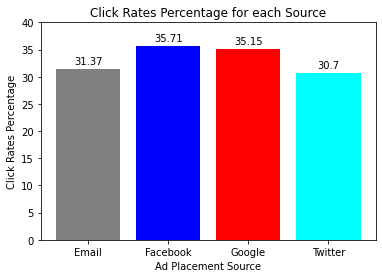

In [8]:
# Visualize the results

# Dataset
utm_source = range(len(clicks_pivot))
clicks_percent = clicks_pivot['percent_clicked'].values

# Plot
ax = plt.subplot()
cbs = plt.bar(utm_source,clicks_percent,color=['gray','blue','red','cyan'])
ax.set_title('Click Rates Percentage for each Source')
ax.set_xlabel('Ad Placement Source')
ax.set_ylabel('Click Rates Percentage')
ax.set_xticks(utm_source,labels = ['Email', 'Facebook','Google','Twitter'])
plt.ylim(0, 40)

# Label the graph with the percentages
for p in cbs:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()



We found that there was a difference in click rates for each source. Facebook ads had the highest percentage at 35.71% closely followed by Google ads at 35.15%. The lowest performing ads clicked were from Twitter.

In [9]:
# Analyzing an A/B test. Column experimental_group tells us whether the user was shown Ad A or Ad B. 
# Using the column is_click, check to see if a greater percentage of users clicked on Ad A or Ad B. 

clicks_exp_pivot = ad_clicks\
   .groupby(['experimental_group',
             'is_click'])\
   .user_id.count()\
   .reset_index()\
   .pivot(
     index='experimental_group',
     columns='is_click',
     values='user_id')\
   .reset_index()\

clicks_exp_pivot['percent_clicked'] = \
   round(clicks_exp_pivot[True] / \
   (clicks_exp_pivot[True] + 
    clicks_exp_pivot[False])\
    *100,2)
    
clicks_exp_pivot

is_click,experimental_group,False,True,percent_clicked
0,A,517,310,37.48
1,B,572,255,30.83


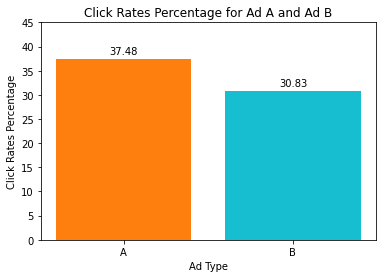

In [10]:
# Dataset
exp = range(len(clicks_exp_pivot))
p_clicked = clicks_exp_pivot['percent_clicked'].values

# Plot
ax = plt.subplot()
cbs = plt.bar(exp,p_clicked,color=['tab:orange','tab:cyan'])
ax.set_title('Click Rates Percentage for Ad A and Ad B')
ax.set_xlabel('Ad Type')
ax.set_ylabel('Click Rates Percentage')
ax.set_xticks(exp,labels = ['A', 'B'])
plt.ylim(0, 45)

# Label the graph with the percentages
for p in cbs:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

A user who was given Ad A was more likely to click the ad at 37.48% than a user who was given Ad B. 

In [11]:
# Also check to see if clicks might have changed by day of the week. Do you recommend that 
# your company use Ad A or Ad B?

# Creating DataFrame for a_clicks.
a_clicks = ad_clicks[
   ad_clicks.experimental_group == 'A']

a_clicks_pivot = a_clicks\
  .groupby(['is_click','day'])\
  .user_id.count()\
  .reset_index()\
  .pivot(
     index = 'day',
     columns = 'is_click',
     values = 'user_id'
   )\
   .reset_index()

a_clicks_pivot['percent_clicked'] = \
   round(a_clicks_pivot[True] / \
   (a_clicks_pivot[True] + 
    a_clicks_pivot[False])\
    *100,2)

a_clicks_pivot

is_click,day,False,True,percent_clicked
0,1 - Monday,70,43,38.05
1,2 - Tuesday,76,43,36.13
2,3 - Wednesday,86,38,30.65
3,4 - Thursday,69,47,40.52
4,5 - Friday,77,51,39.84
5,6 - Saturday,73,45,38.14
6,7 - Sunday,66,43,39.45


In [12]:
# Creating DataFrame for b_clicks.
b_clicks = ad_clicks[
   ad_clicks.experimental_group == 'B']

b_clicks_pivot = b_clicks\
  .groupby(['is_click','day'])\
  .user_id.count()\
  .reset_index()\
  .pivot(
     index = 'day',
     columns = 'is_click',
     values = 'user_id'
   )\
   .reset_index()

b_clicks_pivot['percent_clicked'] = \
   round(b_clicks_pivot[True] / \
   (b_clicks_pivot[True] + 
    b_clicks_pivot[False])\
    *100,2)

b_clicks_pivot

is_click,day,False,True,percent_clicked
0,1 - Monday,81,32,28.32
1,2 - Tuesday,74,45,37.82
2,3 - Wednesday,89,35,28.23
3,4 - Thursday,87,29,25.00
4,5 - Friday,90,38,29.69
5,6 - Saturday,76,42,35.59
6,7 - Sunday,75,34,31.19


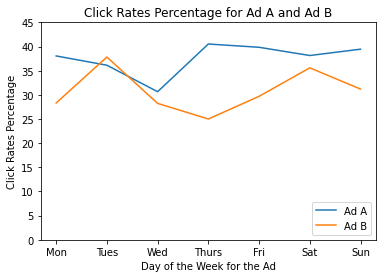

In [13]:
# Dateset
a_is_click = range(len(a_clicks_pivot))
a_pclick = a_clicks_pivot['percent_clicked'].values
b_is_click = range(len(b_clicks_pivot))
b_pclick = b_clicks_pivot['percent_clicked'].values

# Plot
ax = plt.subplot()
plt.plot(a_is_click,a_pclick,label='Ad A')
plt.plot(b_is_click,b_pclick,label='Ad B')
ax.set_title('Click Rates Percentage for Ad A and Ad B')
ax.set_xlabel('Day of the Week for the Ad')
ax.set_ylabel('Click Rates Percentage')
ax.set_xticks(a_is_click,labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylim(0, 45)
plt.legend(loc="lower right")
plt.show()

During the days of the week, the performance of Ad A outpaced that of Ad B. Ad B, in particular, only performed better than Ad A on Tuesday.

# Conclusion

To ensure that the sample is fair, we learned that the company conducted the A/B test with the same amount of participants for the two different ads. Furthtermore, we learned the amount of views per source and the percentage of those that clicked the ad. We found that there was a difference in click rates for each source with Facebook ads having 35.71% clicked rate closely followed by Google ads at 35.15%. This could be explained with the possiblity that these two platforms have a higher number of active users as the amount of users that viewed the ads from these two platforms acounted for 71.58% of the sampled data. We also analyzed if the day of the week affected the click rate to answer the product manager's hypothesis. To summarize the results, we learned that Ad A performed better than Ad B regardless of the day of the week the ad was shown. Therefore, I would recommend that the company run Ad A instead of Ad B and allocate more resources into running the ad on Facebook and Google than the other platforms to maximize user traffic into ShoeFly.com.